# 0.2 Modeling data

#### Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import challenge_alaya.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Read data

In [3]:
input_data = path.data_raw_dir("data.csv")

In [4]:
### Cargar los datos ###
df = pd.read_csv(input_data)

#### Transform and modeling

In [5]:
### DATOS DE MUESTRA ###
#Se selecciona unos datos al azar para posteriormente verificar el clúster al que pertenecen
start = 0   # incluido
end = len(df)    # exclusivo 
n = 4      # size
indices = np.random.randint(low=start, high=end, size=(n))
print(indices)

[13123  5759 14517 11592]


In [6]:
muestras = pd.DataFrame(df.loc[indices],columns = df.keys()).reset_index(drop = True)
df = df.drop(indices, axis=0)

In [7]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing

In [8]:
data_escalada = preprocessing.Normalizer().fit_transform(df)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [9]:
### ANÁLISIS DE MACHINE LEARNING ###
from sklearn.cluster import KMeans

In [10]:
# Se determina las variables a evaluar
X = data_escalada.copy()

In [11]:
## Hallar el valor óptimo de K ##
# Se aplicará el método de codo para hallar  K
# Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = []
for i in range(1,20):
    algoritmo = KMeans(n_clusters= i, init= 'k-means++', max_iter=300, n_init=10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)

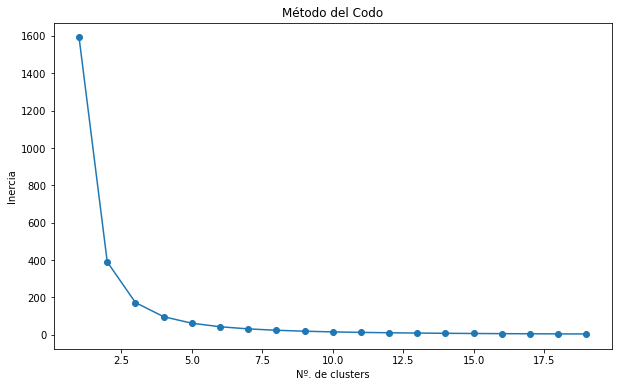

In [12]:
#Se traza la curva de la suma de errores cuadráticos
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('Nº. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)), inercia, marker='o')
plt.show()

In [13]:
## Se aplica el algoritmo de clustering ##
# Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters= 4, init='k-means++', max_iter=300, n_init=10)

In [14]:
# Se entrena el algoritmo
algoritmo.fit(X)

KMeans(n_clusters=4)

In [15]:
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [16]:
#Utilicemos losd atos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)

In [17]:
for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 3
Muestra 2 se encuentra en el clúster: 2
Muestra 3 se encuentra en el clúster: 0


In [18]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

In [19]:
modelo_pca = PCA(n_components=2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

In [20]:
# Se aplica la reducción de dimensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

In [21]:
# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange']

In [22]:
# Se asignan los colores a cada clúster 
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

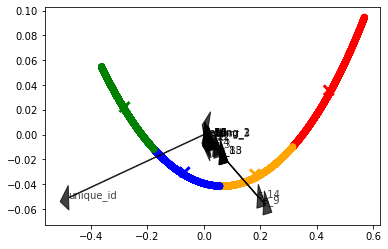

In [23]:
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', alpha=0.75)
    
plt.show()